In [ ]:
# Original dataset downloaded from: https://www.kaggle.com/code/larsboertjes/airbnb-prices-in-european-cities/

In [1]:
import pandas as pd 
paris_df = pd.read_csv("paris_weekdays.csv")

In [2]:
paris_df.shape
# Dataset of 20 variables with 3130 records

(3130, 20)

In [3]:
paris_df.head(2)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,296.159940,Private room,False,True,2,True,0,0,10,97,1,0.699821,0.193709,518.478947,25.239380,1218.662228,71.608028,2.35385,48.86282
1,1,288.237487,Private room,False,True,2,True,0,0,10,97,1,2.100005,0.107221,873.216962,42.507907,1000.543327,58.791463,2.32436,48.85902


# Cleaning and understanding the data

In [4]:
# Eliminating the first column and two normalization columns
# https://www.statology.org/pandas-drop-first-column/
paris_df = paris_df.iloc[: , 1:]
paris_df = paris_df.drop(['attr_index_norm', 'rest_index_norm'], axis='columns')

In [5]:
# Renaming columns
paris_df = paris_df.rename(columns={'realSum':'Price'})
paris_df = paris_df.rename(columns={'dist':'city_distance'})
paris_df = paris_df.rename(columns={'metro_dist':'metro_distance'})
paris_df = paris_df.rename(columns={'attr_index':'attractivity_index'})



In [6]:
# Rounding values to 2 decimals, except longitude and latitude
paris_df.Price = paris_df.Price.round(2)
paris_df.city_distance = paris_df.city_distance.round(2)
paris_df.metro_distance = paris_df.metro_distance.round(2)
paris_df.attractivity_index = paris_df.attractivity_index.round(2)
paris_df.rest_index = paris_df.rest_index.round(2)

In [7]:
paris_df.head(2)

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,city_distance,metro_distance,attractivity_index,rest_index,lng,lat
0,296.16,Private room,False,True,2,True,0,0,10,97,1,0.7,0.19,518.48,1218.66,2.35385,48.86282
1,288.24,Private room,False,True,2,True,0,0,10,97,1,2.1,0.11,873.22,1000.54,2.32436,48.85902


In [8]:
paris_df.describe().round(2)
# We can quickly observe that the average price per listing is 398.79 per week. 
# The average person capacity per listing is 2.95 people. 
# Most of the listing are single rooms. This is shown by the "multi" boolean variable whose average is close to 0.
# Most of the listing are not aveiable for business puproses. This is shown by the "biz" boolean variable whose average is close to 0.
# The cleanliness overall rating is very high averaging 9.25 out of 10 and with little standard deviation 0.99.
# Similar situation for the guest satisfaction, high average rate of 91.85 out of 100 and small standard deviation.
# The distance to the city center is an average distance of 3.01 km. In this case the listings have a further spread due to a std. dev. of 1.47.
# The distance to the metro is on an average of 230 meters.

# We can observe that many variables are not icnluded in this statistic summary because they are either boolean or categorical variables.
# We will need to bin or recategorize these values to dummy varaibles to gain further insights.

,Price,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,city_distance,metro_distance,attractivity_index,rest_index,lng,lat
count,3130.00,3130.00,3130.00,3130.00,3130.00,3130.00,3130.00,3130.00,3130.00,3130.00,3130.00,3130.00,3130.00
mean,398.79,2.95,0.22,0.26,9.25,91.85,0.97,3.01,0.23,372.18,815.19,2.34,48.86
std,396.37,1.23,0.42,0.44,0.99,9.00,0.64,1.47,0.12,158.85,284.12,0.03,0.02
min,92.74,2.00,0.00,0.00,2.00,20.00,0.00,0.07,0.00,116.30,258.67,2.25,48.82
25%,240.00,2.00,0.00,0.00,9.00,89.00,1.00,1.84,0.14,259.09,587.51,2.32,48.85
50%,318.53,2.00,0.00,0.00,9.00,94.00,1.00,3.02,0.21,336.56,765.04,2.35,48.87
75%,463.46,4.00,0.00,1.00,10.00,98.00,1.00,4.06,0.29,455.82,1037.63,2.37,48.88
max,16445.61,6.00,1.00,1.00,10.00,100.00,5.00,7.70,1.15,2054.25,1701.85,2.44,48.90


In [9]:
print('Number of missing values: ', paris_df.isnull().sum())
# Checking null values

Number of missing values:  Price                         0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
city_distance                 0
metro_distance                0
attractivity_index            0
rest_index                    0
lng                           0
lat                           0
dtype: int64


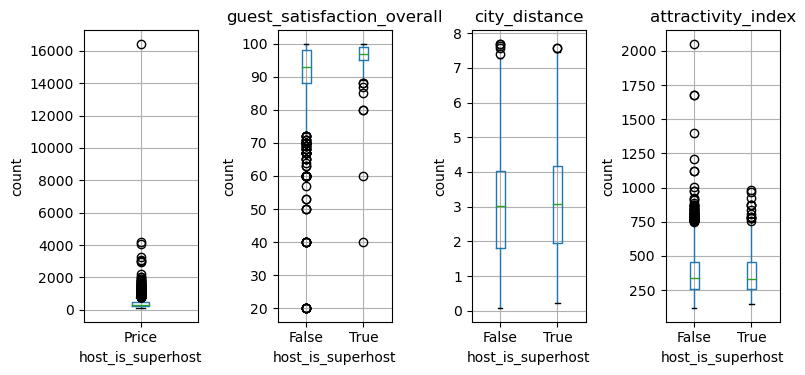

In [10]:
#matplotversion
import matplotlib.pylab as plt
fig, axes = plt.subplots(figsize=(8, 4), nrows = 1, ncols = 4)
paris_df.boxplot(column='Price', ax=axes[0])
paris_df.boxplot(column='guest_satisfaction_overall', by='host_is_superhost', ax=axes[1])
paris_df.boxplot(column='city_distance', by='host_is_superhost', ax=axes[2])
paris_df.boxplot(column='attractivity_index', by='host_is_superhost', ax=axes[3])
for ax in axes:
    ax.set_xlabel('host_is_superhost')
    ax.set_ylabel('count')
plt.suptitle('') 
plt.tight_layout()

# We can see a very high outliers in the Pice variable which has to be removed form the dataset to avoid distortions.

# Dealing with outliers

In [11]:
#Reference: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
#Calculating quartiles and interquartile range to determine outliers, to later sum 
# up the charges of outliers. This way we can see how important outliers are for 
# the business.

# total_charges = int(insurance_df['charges'].sum())
# print('The total sum of charges is: $' + str(total_charges))
q_low = paris_df['Price'].quantile(0.25)
q_hi  = paris_df['Price'].quantile(0.75)
iqr = q_hi-q_low
lower_range = q_low-(1.5*iqr)
upper_range = q_hi+(1.5*iqr)
#print(q_low)
#print(q_hi)
#print(iqr)
#print(lower_range)
#print(upper_range)

n = 0
for i in paris_df.Price:
    if i >=upper_range:
        n = n + 1
    elif i <=lower_range:
        n = n + 1
    else:
        n = n

n = int(n)        
print ('The total amount of Price outliers are ' + str(n) + ' out of ' + str(paris_df.Price.count()) + ' records.')
print ('Every price above $' + str(upper_range.round(2)) + ' is considered a price outlier. The price outliers represent ' + str((n/paris_df.Price.count()).round(2)*100) + '% of the records.') 

The total amount of Price outliers are 192 out of 3130 records.
Every price above $798.65 is considered a price outlier. The price outliers represent 6.0% of the records.


In [12]:
# Removing all records with price over $1000
# https://sparkbyexamples.com/pandas/pandas-drop-rows-with-condition/#:~:text=Use%20pandas.,rows%20with%20condition(s).
paris_df = paris_df[paris_df.Price <= 798.65]

In [13]:
paris_df.shape
# After removing many Price outliers we reduced the records from 3130 to 2938.

(2938, 17)

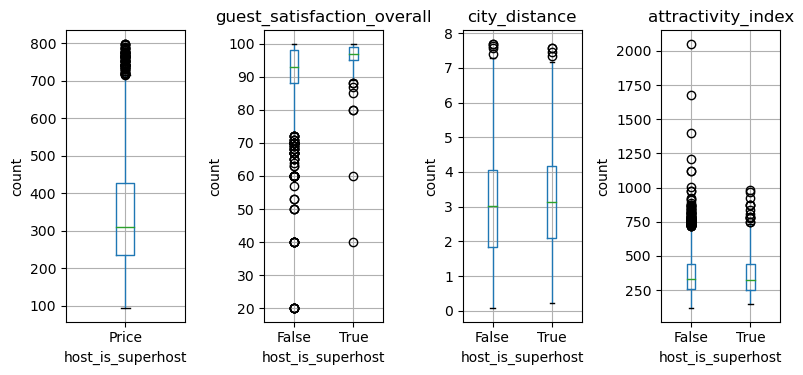

In [14]:
fig, axes = plt.subplots(figsize=(8, 4), nrows = 1, ncols = 4)
paris_df.boxplot(column='Price', ax=axes[0])
paris_df.boxplot(column='guest_satisfaction_overall', by='host_is_superhost', ax=axes[1])
paris_df.boxplot(column='city_distance', by='host_is_superhost', ax=axes[2])
paris_df.boxplot(column='attractivity_index', by='host_is_superhost', ax=axes[3])
for ax in axes:
    ax.set_xlabel('host_is_superhost')
    ax.set_ylabel('count')
plt.suptitle('') 
plt.tight_layout()

In [15]:
# Removing all records with attractivity index over 1000.
# https://sparkbyexamples.com/pandas/pandas-drop-rows-with-condition/#:~:text=Use%20pandas.,rows%20with%20condition(s).
paris_df = paris_df[paris_df.attractivity_index <= 1000]

Text(0.5, 1.0, '')

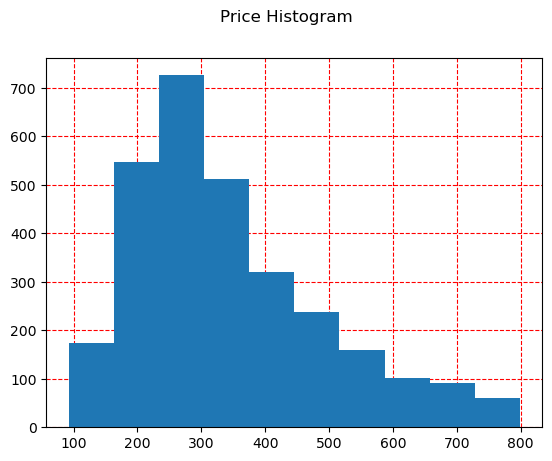

In [16]:
fig, ax = plt.subplots()
ax.hist(paris_df.Price)
ax.set_axisbelow(True)
ax.grid(which='major', color='red', linestyle='--')
plt.suptitle('Price Histogram')
plt.title('')
# Price distribution has now modified because we removed the bigest outliers. After doing this the main the tatitics of price have now
# changed. We still have oultiers but the dispersion of these are veryclose to the rest as before, so we can work with these.

<AxesSubplot:>

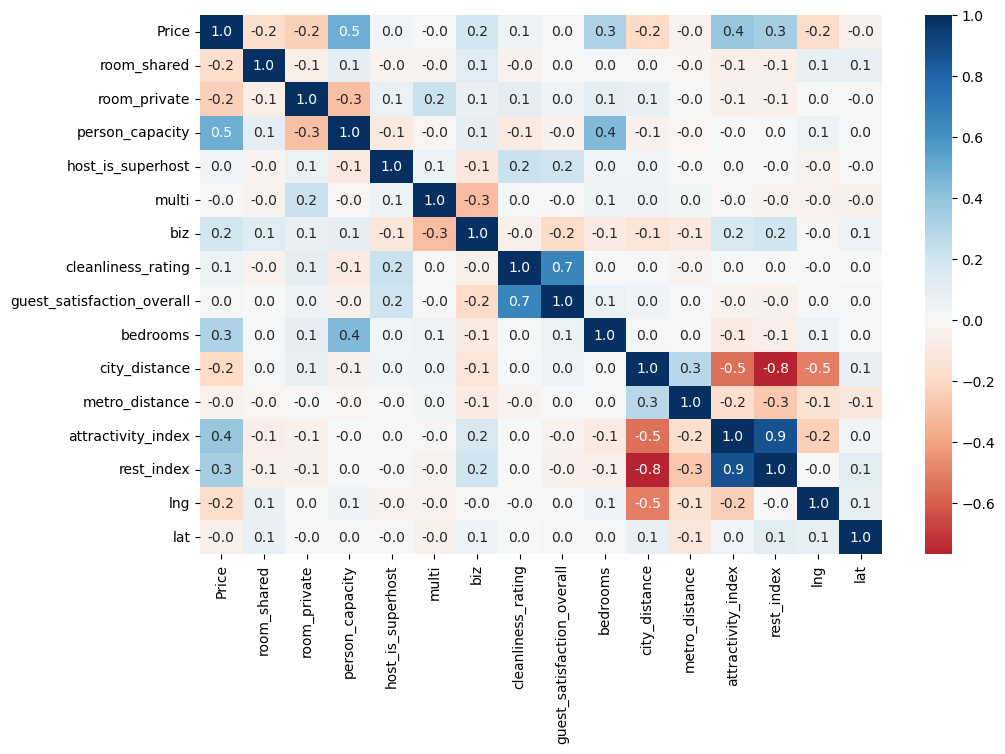

In [17]:
import seaborn as sns
corr = paris_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
# We run a correlation graph to undesrtand which are the most correlated variables to the outcome "Price" variable, and to 
# find out if there is covariability between predictor variables.
# Correlation to "Price" outcome variable:
# We can see that the biggest correlation to the outcome "price" variables are: person capacity with "0.5" "attractivity_index" with 0.4, "rest index" with 0.3 and "bedrooms" with 0.3.
# Then there are other predictors more weakly correlated to the "Price" outcome variable.
# Covariability:
# Rest index and city distance have a high covariability. We'll drop city distance becuase this variable has a lower corrletaion to "Price".
# Attractivity index and rest index have a high covariation. We'll use attractivity index as it has a better correlation to "Price".
# "Cleanlines rating" and "guess satisfaction overall" have a high covariation too, but they are both poorly correlated to price (0.1 and 0.0).

# Standardizing attractivity_index predictor

In [18]:
paris_df.head(2)

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,city_distance,metro_distance,attractivity_index,rest_index,lng,lat
0,296.16,Private room,False,True,2,True,0,0,10,97,1,0.7,0.19,518.48,1218.66,2.35385,48.86282
1,288.24,Private room,False,True,2,True,0,0,10,97,1,2.1,0.11,873.22,1000.54,2.32436,48.85902


In [19]:
attr_df = pd.DataFrame(paris_df.attractivity_index)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
norm_df = pd.DataFrame(scaler.fit_transform(attr_df),index=attr_df.index,columns=attr_df.columns)
print(norm_df)

#norm_df = pd.DataFrame(scaler.fit_transform(onlyNumeric_df),index=onlyNumeric_df.index,columns=onlyNumeric_df.columns)
#print(norm_df)

      attractivity_index
0               0.463576
1               0.872470
2               0.378372
3               0.490848
4               0.334997
...                  ...
3125            0.079752
3126            0.064964
3127            0.071373
3128            0.137016
3129            0.097215

[2931 rows x 1 columns]


In [21]:
paris_df['attractivity_index_standard'] = round(norm_df.attractivity_index*100,2)

In [22]:
paris_df.attractivity_index_standard.mean()

28.308065506653

In [23]:
paris_df.head(2)

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,city_distance,metro_distance,attractivity_index,rest_index,lng,lat,attractivity_index_standard
0,296.16,Private room,False,True,2,True,0,0,10,97,1,0.7,0.19,518.48,1218.66,2.35385,48.86282,46.36
1,288.24,Private room,False,True,2,True,0,0,10,97,1,2.1,0.11,873.22,1000.54,2.32436,48.85902,87.25


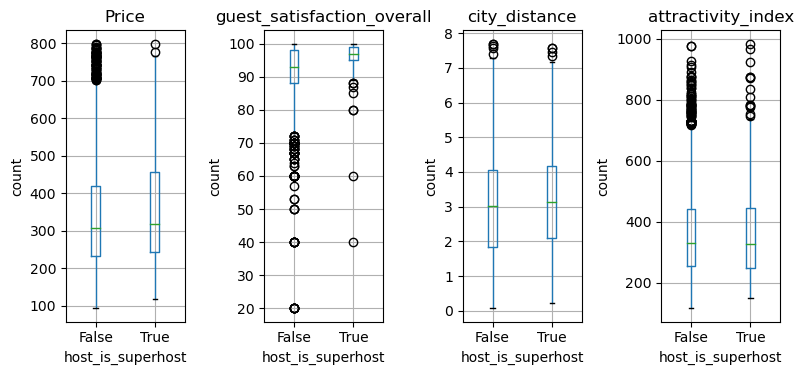

In [24]:
fig, axes = plt.subplots(figsize=(8, 4), nrows = 1, ncols = 4)
paris_df.boxplot(column='Price', by='host_is_superhost',ax=axes[0])
paris_df.boxplot(column='guest_satisfaction_overall', by='host_is_superhost', ax=axes[1])
paris_df.boxplot(column='city_distance', by='host_is_superhost', ax=axes[2])
paris_df.boxplot(column='attractivity_index', by='host_is_superhost', ax=axes[3])
for ax in axes:
    ax.set_xlabel('host_is_superhost')
    ax.set_ylabel('count')
plt.suptitle('') 
plt.tight_layout()
# Notice how superhost prices have a higher average price than non-superhost listings. The same happens with guest satisfaction, 
# but not necessarily with attractivity distance.  

<AxesSubplot:xlabel='attractivity_index_standard', ylabel='Price'>

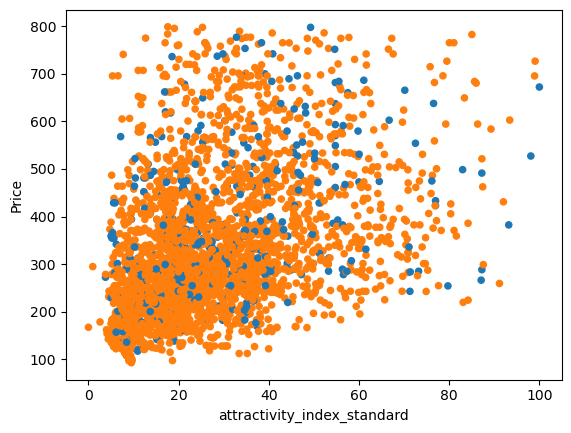

In [25]:
# Scatterplot
paris_df.plot.scatter(x='attractivity_index_standard', y='Price', c=['C0' if c == 1 else 'C1' for c in paris_df.host_is_superhost])


# Creating categorical bins for some predictors

In [26]:
paris_df.head(8)

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,city_distance,metro_distance,attractivity_index,rest_index,lng,lat,attractivity_index_standard
0,296.16,Private room,False,True,2,True,0,0,10,97,1,0.70,0.19,518.48,1218.66,2.35385,48.86282,46.36
1,288.24,Private room,False,True,2,True,0,0,10,97,1,2.10,0.11,873.22,1000.54,2.32436,48.85902,87.25
2,211.34,Private room,False,True,2,False,0,0,10,94,1,3.30,0.23,444.56,902.85,2.31714,48.87475,37.84
3,298.96,Entire home/apt,False,False,2,False,0,1,9,91,1,0.55,0.20,542.14,1199.18,2.35600,48.86100,49.08
4,247.93,Entire home/apt,False,False,4,False,0,0,7,82,1,1.20,0.10,406.93,1070.78,2.35915,48.86648,33.50
5,527.08,Entire home/apt,False,False,4,True,0,0,10,93,1,1.54,0.55,967.48,1095.87,2.33201,48.85891,98.11
6,193.63,Private room,False,True,2,False,0,0,10,90,1,4.00,0.42,422.90,803.43,2.30670,48.87582,35.34
7,207.15,Entire home/apt,False,False,2,False,0,0,10,95,1,1.43,0.21,374.37,1018.16,2.36075,48.86825,29.75


In [27]:
paris_df.describe()

,Price,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,city_distance,metro_distance,attractivity_index,rest_index,lng,lat,attractivity_index_standard
count,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000
mean,343.514906,2.845786,0.223132,0.247356,9.234391,91.745138,0.915387,3.037707,0.228731,361.889345,802.651528,2.344094,48.864292,28.308066
std,149.795011,1.146637,0.416417,0.431549,0.998971,9.016568,0.594920,1.461674,0.125454,145.854997,280.163650,0.034359,0.017708,16.812159
min,92.740000,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.070000,0.000000,116.300000,258.670000,2.247880,48.820280,0.000000
25%,235.695000,2.000000,0.000000,0.000000,9.000000,88.000000,1.000000,1.890000,0.140000,255.575000,577.775000,2.323450,48.851560,16.055000
50%,308.040000,2.000000,0.000000,0.000000,9.000000,94.000000,1.000000,3.050000,0.210000,328.950000,746.840000,2.347440,48.866200,24.510000
75%,425.485000,4.000000,0.000000,0.000000,10.000000,98.000000,1.000000,4.070000,0.290000,440.825000,1021.515000,2.370020,48.878365,37.405000
max,798.540000,6.000000,1.000000,1.000000,10.000000,100.000000,5.000000,7.700000,1.150000,983.860000,1688.080000,2.438590,48.899450,100.000000


In [28]:
# Price binning
# Ref: https://www.geeksforgeeks.org/floor-ceil-function-python/
paris_df['Price_bin'] = pd.cut(paris_df.Price/72.9, range(0, 13), labels=False) 
# print(paris_df['Price_bin'].head(9), paris_df['Price'].head(9))

In [29]:
#  City distance binning
# Ref: https://www.geeksforgeeks.org/floor-ceil-function-python/
paris_df['city_distance_bin'] = pd.cut(((paris_df.city_distance/1.59)+1), range(0, 8), labels=False) 
# print(paris_df['city_distance_bin'].head(9), paris_df['city_distance'].head(9))

In [30]:
#  Attractivity Index Standard binning
# Ref: https://www.geeksforgeeks.org/floor-ceil-function-python/
paris_df['attractivity_index_standard_bin'] = pd.cut((paris_df.attractivity_index_standard/10), range(0, 13), labels=False) 

In [31]:
paris_df.host_is_superhost.value_counts()

False    2531
True      400
Name: host_is_superhost, dtype: int64

In [32]:
paris_df.groupby(['room_type', 'host_is_superhost'])['Price'].mean().round(2)
# We notice that superhost listings are priced higher than non superhosts.

room_type        host_is_superhost
Entire home/apt  False                365.32
                 True                 390.48
Private room     False                281.94
                 True                 294.05
Shared room      False                136.82
                 True                 183.46
Name: Price, dtype: float64

In [33]:
paris_df.groupby(['room_type', 'host_is_superhost'])['Price'].count()


room_type        host_is_superhost
Entire home/apt  False                1877
                 True                  268
Private room     False                 610
                 True                  129
Shared room      False                  44
                 True                    3
Name: Price, dtype: int64

In [34]:
paris_df.groupby(['Price_bin', 'host_is_superhost'])['Price'].mean().round(2)

Price_bin  host_is_superhost
1          False                124.60
           True                 132.53
2          False                185.71
           True                 190.98
3          False                256.45
           True                 256.28
4          False                326.35
           True                 327.35
5          False                396.51
           True                 389.74
6          False                471.35
           True                 473.83
7          False                546.08
           True                 551.71
8          False                617.95
           True                 616.20
9          False                689.18
           True                 680.95
10         False                761.64
           True                 755.48
Name: Price, dtype: float64

In [35]:
#city_distance
import numpy as np
pd.pivot_table(paris_df, values='Price', index=['city_distance_bin'], 
columns=['host_is_superhost'], aggfunc=np.mean, margins=True)

host_is_superhost,False,True,All
city_distance_bin,,,
1,408.565963,422.352500,410.354486
2,341.594890,353.199776,343.157759
3,302.744653,325.780839,305.921292
4,352.107888,378.628378,355.515035
5,314.917857,342.730000,321.870893
All,341.252434,357.830700,343.514906


Text(0, 0.5, 'Avg. Price')

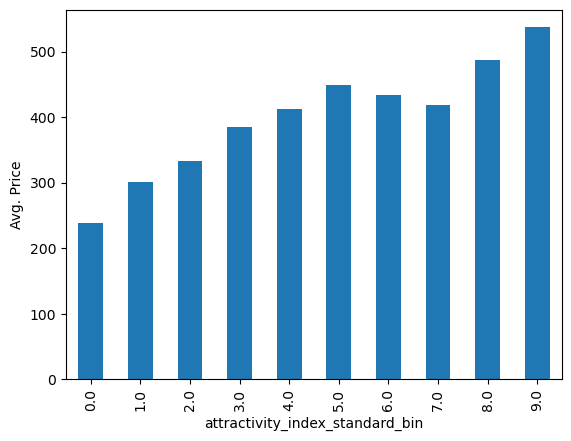

In [36]:
#Pandas version - bar chart
ax = paris_df.groupby(['attractivity_index_standard_bin']).mean().Price
fig = ax.plot(kind='bar')
fig.set_ylabel('Avg. Price')

Text(0, 0.5, 'Avg. Price')

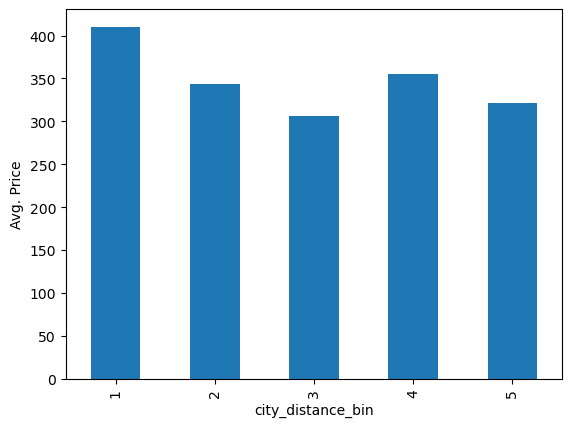

In [37]:
#Pandas version - bar chart
ax = paris_df.groupby(['city_distance_bin']).mean().Price
fig = ax.plot(kind='bar')
fig.set_ylabel('Avg. Price')

In [38]:
paris_df.head(3)

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,city_distance,metro_distance,attractivity_index,rest_index,lng,lat,attractivity_index_standard,Price_bin,city_distance_bin,attractivity_index_standard_bin
0,296.16,Private room,False,True,2,True,0,0,10,97,...,0.7,0.19,518.48,1218.66,2.35385,48.86282,46.36,4,1,4.0
1,288.24,Private room,False,True,2,True,0,0,10,97,...,2.1,0.11,873.22,1000.54,2.32436,48.85902,87.25,3,2,8.0
2,211.34,Private room,False,True,2,False,0,0,10,94,...,3.3,0.23,444.56,902.85,2.31714,48.87475,37.84,2,3,3.0


# Finding out the best predictor variables

# Backward elimination

In [39]:
paris_df.room_shared = paris_df.room_shared.astype('category')
paris_df.room_private = paris_df.room_private.astype('category')
paris_df.host_is_superhost = paris_df.host_is_superhost.astype('category')

In [40]:
predictors = ['room_type', 'room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 
              'guest_satisfaction_overall', 'bedrooms', 'city_distance', 'metro_distance', 'lng', 'lat', 'attractivity_index_standard']
outcome = 'Price'

In [41]:
X = pd.get_dummies(paris_df[predictors], drop_first=True)
y = paris_df[outcome]

In [42]:
X.columns

Index(['person_capacity', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'city_distance',
       'metro_distance', 'lng', 'lat', 'attractivity_index_standard',
       'room_type_Private room', 'room_type_Shared room', 'room_shared_True',
       'room_private_True', 'host_is_superhost_True'],
      dtype='object')

In [43]:
# Ref: ChatGPT: https://chat.openai.com/chat
import pandas as pd
import statsmodels.api as sm


def backward_elimination(X, y, significance_level):
    num_vars = len(X.columns)
    for i in range(0, num_vars):
        regressor = sm.OLS(y, X).fit()
        max_pvalue = max(regressor.pvalues)
        if max_pvalue > significance_level:
            for j in range(0, num_vars - i):
                if (regressor.pvalues[j] == max_pvalue):
                    X = X.drop(X.columns[j], axis=1)
    print(regressor.summary())
    return X

# set your significance level
sig_level = 0.05

# call the backward_elimination function and print the final set of independent variables
X_opt = backward_elimination(X, y, sig_level)
print(X_opt)

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              2896.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                        17:40:02   Log-Likelihood:                         -17781.
No. Observations:                2931   AIC:                                  3.559e+04
Df Residuals:                    2919   BIC:                                  3.566e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [44]:
X.columns

Index(['person_capacity', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'city_distance',
       'metro_distance', 'lng', 'lat', 'attractivity_index_standard',
       'room_type_Private room', 'room_type_Shared room', 'room_shared_True',
       'room_private_True', 'host_is_superhost_True'],
      dtype='object')

In [45]:
# The predictor variables will be: ['person_capacity', 'multi', 'biz', 'cleanliness_rating',
#       'bedrooms', 'city_distance', 'lng', 'lat', 'attractivity_index_standard',
#       'room_type_Private room', 'room_type_Shared room', 'room_shared_True',
#       'room_private_True', 'host_is_superhost_True']

# We won't be using: ['guest_satisfaction_overall', 'metro_distance']

In [46]:
#parisformodel_df = X

In [47]:
#parisformodel_df

# RUNNING ALGORITHMS #

## Linear regression

In [48]:
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt
from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart

In [49]:
# Split the data into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [50]:
# Built the Linear Model based on the training data
reg = LinearRegression()
reg.fit(train_X, train_y)

LinearRegression()

In [51]:
# Evaluate Perfomance on training set (60% of the records). 
regressionSummary(train_y, reg.predict(train_X))
# The mean absolute error is of $81. 


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 106.8565
            Mean Absolute Error (MAE) : 81.3135
          Mean Percentage Error (MPE) : -8.9484
Mean Absolute Percentage Error (MAPE) : 26.2080


Text(0.5, 0, 'Training')

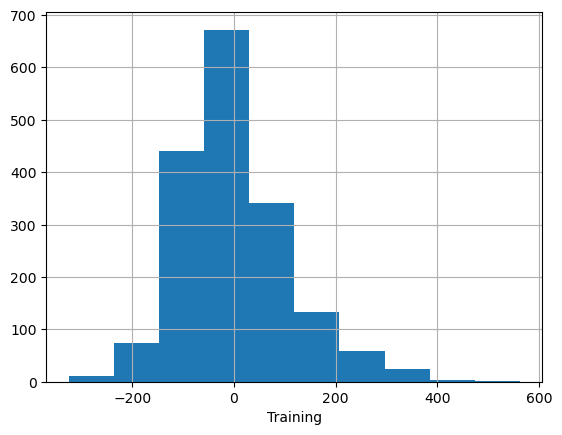

In [53]:
# Evaluate Perfomance. Residual analysis
# training 
train_e = train_y - reg.predict(train_X)
fig, ax = plt.subplots()
ax = train_e.hist()
ax.set_xlabel('Training')

Text(0.5, 0, 'Validation')

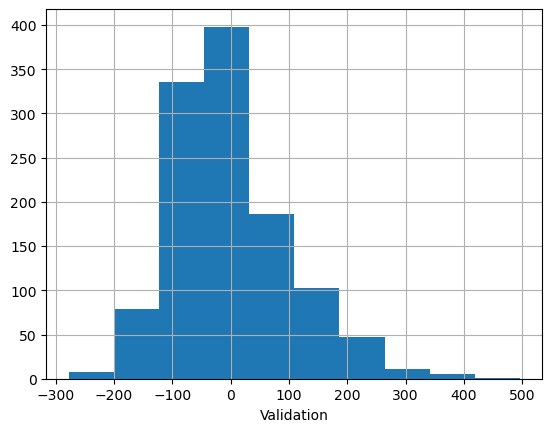

In [54]:
# validation residuals
valid_e = valid_y - reg.predict(valid_X)
fig, ax = plt.subplots()
ax = valid_e.hist()
ax.set_xlabel('Validation')

In [55]:
# The residual of both sets of data are similar in shape, but not totally normally distributed.

# K-NN

In [56]:
# We now want to classify the overall satisfaction (categorically binned) expected for a new listing. If the marketing team
# can predict the overall review of this new listing, they could promote it on their webpage before even having reviews. 
# The new listing has a price of 530, distance from the city of 1.9 KM, a distance to the metro of 0.17, and 
# cleanliness score of 8. We want to find out the expected classifier for this listing.

In [57]:
parisKnn_df = pd.read_csv("paris_weekdays_knn.csv")

In [58]:
# Binning "guest_satisfaction_overall"
parisKnn_df['guest_satisfaction_overall_bin2']=pd.cut(parisKnn_df.guest_satisfaction_overall,bins=[0,25,40,65,81,100],labels=['Very_Unsatisfied','Unsatisfied','Neutral','Satisfied','Very_Satisfied'])

In [59]:
#Adding index
parisKnn_df['Number'] = parisKnn_df.index + 1

In [60]:
#Split the data into training (60%) and testing (40%)
trainData, validData = train_test_split(parisKnn_df, 
test_size=0.4, random_state=0)
print(trainData.shape, validData.shape)

(1762, 7) (1176, 7)


In [61]:
# Normalizing the data
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['Price', 'city_distance', 'metro_distance', 'cleanliness_rating']])

StandardScaler()

In [62]:
newParisData = pd.DataFrame([{'Price': 530, 'city_distance': 1.9, 'metro_distance': 0.17, 'cleanliness_rating': 8}])
newParisData

,Price,city_distance,metro_distance,cleanliness_rating
0,530,1.9,0.17,8


In [63]:
# Normalization of the full dataset
parisNorm = pd.concat([pd.DataFrame(scaler.transform(parisKnn_df[['Price', 'city_distance', 'metro_distance', 'cleanliness_rating']]), 
columns=['zPrice', 'zcity_distance', 'zmetro_distance', 'zcleanliness_rating']),
parisKnn_df[['guest_satisfaction_overall_bin2', 'Number']]], axis=1)
trainNorm = parisNorm.iloc[trainData.index]
validNorm = parisNorm.iloc[validData.index]
newParisDataNorm = pd.DataFrame(scaler.transform(newParisData), columns=['Price', 'city_distance', 'metro_distance', 'cleanliness_rating'])

In [64]:
newParisDataNorm

,Price,city_distance,metro_distance,cleanliness_rating
0,1.249544,-0.807188,-0.485576,-1.184043


In [65]:
#Use k-nearest neighbor against the normalized training data with K=9
knn = NearestNeighbors(n_neighbors=9)
knn.fit(trainNorm[['zPrice', 'zcity_distance', 'zmetro_distance', 'zcleanliness_rating']])
distances, indices = knn.kneighbors(newParisDataNorm)
print(trainNorm.iloc[indices[0], :]) 
# With K=9 it is expected that the classification of this new listing would be "Very Satisfied" in "overal guest satisfaction". 
# But we still don't know which is the best K to use.

       zPrice  zcity_distance  zmetro_distance  zcleanliness_rating  \
294  1.508973       -0.833526        -0.702660            -1.184043   
494  0.982219       -0.862184        -0.239054            -1.184043   
218  1.795590       -1.025290        -0.538560            -1.184043   
698  0.615040       -0.830666        -0.593770            -1.184043   
313  1.485734       -0.199841        -0.418050            -1.184043   
466  1.037993       -1.427792        -0.225883            -1.184043   
620  0.752926       -0.765961         0.088962            -1.184043   
664  0.675462       -0.769278         0.077416            -1.184043   
756  0.520534       -1.233146        -0.317882            -1.184043   

    guest_satisfaction_overall_bin2  Number  
294                  Very_Satisfied     295  
494                       Satisfied     495  
218                  Very_Satisfied     219  
698                       Satisfied     699  
313                       Satisfied     314  
466          

C:\Users\Esteban\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price
- city_distance
- cleanliness_rating
- metro_distance
Feature names seen at fit time, yet now missing:
- zPrice
- zcity_distance
- zcleanliness_rating
- zmetro_distance

  warnings.warn(message, FutureWarning)


# Measuring the accuracy of different k values on validation set

In [66]:
train_X = trainNorm[['zPrice', 'zcity_distance', 'zmetro_distance', 'zcleanliness_rating']]
train_y = trainNorm['guest_satisfaction_overall_bin2']
valid_X = validNorm[['zPrice', 'zcity_distance', 'zmetro_distance', 'zcleanliness_rating']]
valid_y = validNorm['guest_satisfaction_overall_bin2']

In [67]:
# Train a classifier for different values of k
results = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

C:\Users\Esteban\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Esteban\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

In [68]:
# Ref: https://www.geeksforgeeks.org/how-to-print-an-entire-pandas-dataframe-in-python/
results2 = pd.DataFrame(results)
display(results2.to_string())

'     k  accuracy\n0    1  0.852891\n1    2  0.791667\n2    3  0.888605\n3    4  0.876701\n4    5  0.895408\n5    6  0.891156\n6    7  0.892007\n7    8  0.895408\n8    9  0.896259\n9   10  0.898810\n10  11  0.892857\n11  12  0.894558\n12  13  0.896259\n13  14  0.892007\n14  15  0.895408\n15  16  0.894558\n16  17  0.893707\n17  18  0.894558\n18  19  0.896259\n19  20  0.896259\n20  21  0.896259\n21  22  0.895408\n22  23  0.894558\n23  24  0.893707\n24  25  0.896259\n25  26  0.893707\n26  27  0.894558\n27  28  0.894558\n28  29  0.895408\n29  30  0.895408\n30  31  0.895408\n31  32  0.895408\n32  33  0.895408\n33  34  0.896259\n34  35  0.896259\n35  36  0.895408\n36  37  0.893707\n37  38  0.893707\n38  39  0.894558\n39  40  0.896259\n40  41  0.895408\n41  42  0.894558\n42  43  0.895408\n43  44  0.896259\n44  45  0.895408\n45  46  0.892007\n46  47  0.892857\n47  48  0.892007\n48  49  0.892007'

In [69]:
print(results2.accuracy.max())
# We have to choose the K value which has the maximum accuracy of 0.8988. The K for this would be K=10.

0.8988095238095238


In [70]:
paris_X = parisNorm[['zPrice', 'zcity_distance', 'zmetro_distance', 'zcleanliness_rating']]
paris_y = parisNorm['guest_satisfaction_overall_bin2']
knn = KNeighborsClassifier(n_neighbors=10).fit(paris_X, paris_y)
distances, indices = knn.kneighbors(newParisDataNorm)
print(knn.predict(newParisDataNorm))
print('Distances',distances)
print('Indices', indices)
print(parisNorm.iloc[indices[0], :])

['Very_Satisfied']
Distances [[0.31206493 0.33929718 0.36147198 0.36777777 0.50168641 0.52265311
  0.54530241 0.59037417 0.6440898  0.65514583]]
Indices [[317 294 478 494 411 458 638 218 698 313]]
       zPrice  zcity_distance  zmetro_distance  zcleanliness_rating  \
317  1.485734       -0.696188        -0.656683            -1.184043   
294  1.508973       -0.833526        -0.702660            -1.184043   
478  1.036444       -1.009013        -0.274585            -1.184043   
494  0.982219       -0.862184        -0.239054            -1.184043   
411  1.191371       -1.107884        -0.882926            -1.184043   
458  1.068979       -1.290622        -0.568368            -1.184043   
638  0.728138       -0.960971        -0.528483            -1.184043   
218  1.795590       -1.025290        -0.538560            -1.184043   
698  0.615040       -0.830666        -0.593770            -1.184043   
313  1.485734       -0.199841        -0.418050            -1.184043   

    guest_satisfactio

C:\Users\Esteban\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price
- city_distance
- cleanliness_rating
- metro_distance
Feature names seen at fit time, yet now missing:
- zPrice
- zcity_distance
- zcleanliness_rating
- zmetro_distance

  warnings.warn(message, FutureWarning)
C:\Users\Esteban\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price
- city_distance
- cleanliness_rating
- metro_distance
Feature names seen at fit time, yet now missing:
- zPrice
- zcity_distance
- zcleanliness_rating
- zmetro_distance

  warnings.warn(message, FutureWarning)
C:\Users\Esteban\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike

In [71]:
# Conclusion: A new listing with Price of 530, distance from the city of 1.9 KM, a distance to the metro of 0.17, and 
# cleanliness score of 8 would have an expected classifier of "Very Satisfied" in overall guest satisfaction. 

# CART

In [72]:
# Using the same new listing as in Naive Bayes method, we want to test if a Classification and Regression Tree would also
# classify this listing as a "Very Satisfied" guest.

In [73]:
parisKnn_df

,Price,guest_satisfaction_overall,city_distance,metro_distance,cleanliness_rating,guest_satisfaction_overall_bin2,Number
0,798.536676,86,2.336880,0.188163,10,Very_Satisfied,1
1,797.371610,97,3.364188,0.246136,10,Very_Satisfied,2
2,797.371610,92,1.476329,0.236090,10,Very_Satisfied,3
3,795.274490,50,2.029013,0.210486,7,Neutral,4
4,789.216143,82,1.035722,0.189733,8,Very_Satisfied,5
...,...,...,...,...,...,...,...
2933,97.632585,90,3.934853,0.255165,8,Very_Satisfied,2934
2934,97.632585,80,3.966733,0.279526,7,Satisfied,2935
2935,97.399571,90,4.394438,0.139683,9,Very_Satisfied,2936
2936,96.467518,92,4.306579,0.020260,8,Very_Satisfied,2937


In [74]:
parisCart_df = parisKnn_df.drop(['Number', 'guest_satisfaction_overall'], axis='columns')

In [75]:
#Split the data into training (60%) and testing (40%)
trainDataCart, validDataCart = train_test_split(parisCart_df, 
test_size=0.4, random_state=0)
print(trainDataCart.shape, validDataCart.shape)

(1762, 5) (1176, 5)


In [76]:
trainDataCart

,Price,city_distance,metro_distance,cleanliness_rating,guest_satisfaction_overall_bin2
250,590.921801,6.366847,0.128918,10,Satisfied
1779,278.217914,3.790536,0.034303,10,Very_Satisfied
1982,254.683568,4.594416,0.136495,8,Satisfied
1817,274.256687,4.386183,0.332402,10,Very_Satisfied
1045,366.063939,7.576647,0.270140,10,Very_Satisfied
...,...,...,...,...,...
763,417.093858,3.416644,0.046494,10,Very_Satisfied
835,403.113058,2.049926,0.327747,10,Very_Satisfied
1653,289.402554,1.994461,0.254804,10,Very_Satisfied
2607,184.546556,2.015575,0.416829,6,Satisfied


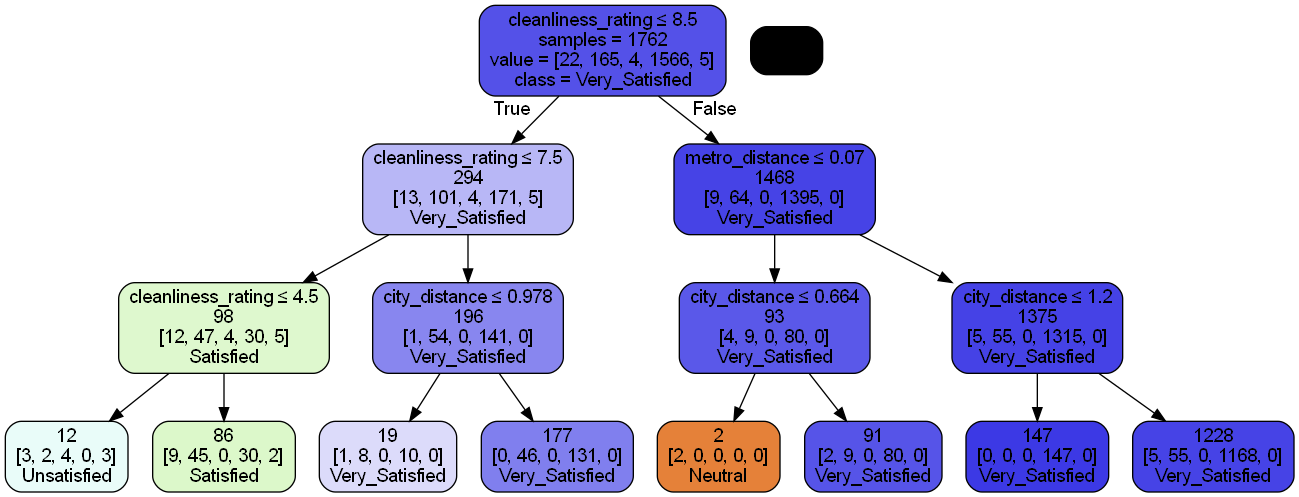

In [77]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dmba import plotDecisionTree, classificationSummary, regressionSummary
classTree = DecisionTreeClassifier(random_state=0, max_depth=3)
classTree.fit(trainDataCart.drop(columns=['guest_satisfaction_overall_bin2']), trainDataCart['guest_satisfaction_overall_bin2'])
plotDecisionTree(classTree, feature_names=trainDataCart.columns[:4], class_names=classTree.classes_)

In [78]:
# If our new listing has: Price=530, city distance=1.9KM, metro distance=0.17, cleanliness score=8, this regression
# tree with a 3 depth level would classify this new listing as a "Very Satisfied" guest. The same value classification 
# as in KNN method.

In [79]:
# At a regression table of level of 3, the accuracy score is of 75.14% for the training data.
# Ref: scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
Y_pred = classTree.predict(trainDataCart.drop(columns=['guest_satisfaction_overall_bin2']))
from sklearn.metrics import accuracy_score
accuracy_score(trainDataCart['guest_satisfaction_overall_bin2'], Y_pred)

0.9006810442678774

In [80]:
# At a regression table of level of 3, the accuracy score is of 76.36% for the validacion data.
# Ref: scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
Y_pred = classTree.predict(validDataCart.drop(columns=['guest_satisfaction_overall_bin2']))
from sklearn.metrics import accuracy_score
accuracy_score(validDataCart['guest_satisfaction_overall_bin2'], Y_pred)

0.9013605442176871

In [81]:
# We then continued trying different depth levels for the regression tree. At level 5 we increased accuracy of training data 
# to 91.1%, but validation data dropped to 89.2%. At level 10 we improved accuracy of training data to 95.3% and decreased 
# accuracy of validation data to 87.9%.
# This trend is caused by the overfitness of the model, where increasing the leves of the regression trees improves the
# accuracy of the training data but deteriorates the accuracy of the validation data. Due to this we decided that 
# level 3 is an optimal level, where both training and validation data obtain a similar level of accuracy above 90%.

# Naive Bayes Classifier

In [82]:
paris_df.head(2)

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,city_distance,metro_distance,attractivity_index,rest_index,lng,lat,attractivity_index_standard,Price_bin,city_distance_bin,attractivity_index_standard_bin
0,296.16,Private room,False,True,2,True,0,0,10,97,...,0.7,0.19,518.48,1218.66,2.35385,48.86282,46.36,4,1,4.0
1,288.24,Private room,False,True,2,True,0,0,10,97,...,2.1,0.11,873.22,1000.54,2.32436,48.85902,87.25,3,2,8.0


In [145]:
paris_df.shape

(2931, 23)

In [146]:
# Deleting the columns which is of no importance to our analysis
# paris_df = paris_df.drop('Unnamed: 0',axis = 1)
# paris_df.head(3)

In [147]:
paris_df.bedrooms = paris_df.bedrooms.astype('category')
paris_df.cleanliness_rating = paris_df.cleanliness_rating.astype('category')
paris_df.person_capacity = paris_df.person_capacity.astype('category')
paris_df.multi = paris_df.multi.astype('category')
paris_df.biz = paris_df.biz.astype('category')
paris_df.room_shared = paris_df.room_shared.astype('category')
paris_df.room_type = paris_df.room_type.astype('category')

In [148]:
paris_df['guest_satisfaction_overall_bin2']=pd.cut(paris_df.guest_satisfaction_overall,bins=[0,25,40,65,80,100],labels=['Very_Unsatisfied','Unsatisfied','Neutral','Satisfied','Very_Satisfied'])

In [149]:
paris_df.Price_bin=pd.cut(paris_df.Price,bins=[0,130,200,400,600,1000],labels=['Cheap','Mid-range','Expensive','Very_Expensive','Luxurious'])
#paris_df.Price_bin = paris_df.Price_bin.astype('category')
paris_df['metro_distance_bin']=pd.cut(paris_df.metro_distance,bins=[0,1,2,3,100],labels=['Very_Close','Close','Far','Very Far'])

In [150]:
paris_df.head(2)

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,attractivity_index,rest_index,lng,lat,attractivity_index_standard,Price_bin,city_distance_bin,attractivity_index_standard_bin,guest_satisfaction_overall_bin2,metro_distance_bin
0,296.16,Private room,False,True,2,True,0,0,10,97,...,518.48,1218.66,2.35385,48.86282,46.36,Expensive,1,4.0,Very_Satisfied,Very_Close
1,288.24,Private room,False,True,2,True,0,0,10,97,...,873.22,1000.54,2.32436,48.85902,87.25,Expensive,2,8.0,Very_Satisfied,Very_Close


In [151]:
predictors = ['Price_bin', 'city_distance_bin', 'cleanliness_rating', 'metro_distance_bin']
outcome = 'guest_satisfaction_overall_bin2'

In [152]:
X = pd.get_dummies(paris_df[predictors])
y = paris_df[outcome]
classes = ['Very_Unsatisfied','Unsatisfied','Neutral','Satisfied','Very_Satisfied']

In [153]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

In [154]:
X_train.columns

Index(['city_distance_bin', 'Price_bin_Cheap', 'Price_bin_Mid-range',
       'Price_bin_Expensive', 'Price_bin_Very_Expensive',
       'Price_bin_Luxurious', 'cleanliness_rating_2', 'cleanliness_rating_4',
       'cleanliness_rating_5', 'cleanliness_rating_6', 'cleanliness_rating_7',
       'cleanliness_rating_8', 'cleanliness_rating_9', 'cleanliness_rating_10',
       'metro_distance_bin_Very_Close', 'metro_distance_bin_Close',
       'metro_distance_bin_Far', 'metro_distance_bin_Very Far'],
      dtype='object')

In [155]:
from sklearn.naive_bayes import MultinomialNB
paris_nb = MultinomialNB(alpha=1)
paris_nb.fit(X_train, y_train)

MultinomialNB(alpha=1)

In [156]:
predProb_train = paris_nb.predict_proba(X_train)
predProb_valid = paris_nb.predict_proba(X_valid)

In [157]:
y_valid_pred = paris_nb.predict(X_valid)
y_train_pred = paris_nb.predict(X_train)

In [158]:
df = pd.concat([pd.DataFrame({'actual': y_valid, 'predicted': y_valid_pred})], axis=1)

In [159]:
mask = ((X_valid.metro_distance_bin_Very_Close == 1)&(X_valid.Price_bin_Very_Expensive == 1) & (X_valid.city_distance_bin == 1) & (X_valid.cleanliness_rating_8 ==1))

In [160]:
print(df[mask])

             actual       predicted
55   Very_Satisfied  Very_Satisfied
249       Satisfied  Very_Satisfied
590  Very_Satisfied  Very_Satisfied
662  Very_Satisfied  Very_Satisfied
623  Very_Satisfied  Very_Satisfied
895       Satisfied  Very_Satisfied
717  Very_Satisfied  Very_Satisfied
471  Very_Satisfied  Very_Satisfied
257  Very_Satisfied  Very_Satisfied


In [162]:
# Ref: https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

#y_pred = model.predict(X_test)
accuracy = accuracy_score(y_valid_pred, y_valid)


print("Accuracy:", accuracy)


Accuracy: 0.9002557544757033


In [104]:
# A new listing with Price of 530, distance from the city of 1.9 KM, a distance to the metro of 0.17, and 
# cleanliness score of 8 would have an expected classifier of "Very Satisfied". This result is the same as the 
# the results in the KNN and CART models.

# Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from dmba.metric import AIC_score

In [131]:
paris_df.head(3)

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,attractivity_index,rest_index,lng,lat,attractivity_index_standard,Price_bin,city_distance_bin,attractivity_index_standard_bin,guest_satisfaction_overall_bin2,metro_distance_bin
0,296.16,Private room,False,True,2,True,0,0,10,97,...,518.48,1218.66,2.35385,48.86282,46.36,Expensive,1,4.0,Very_Satisfied,Very_Close
1,288.24,Private room,False,True,2,True,0,0,10,97,...,873.22,1000.54,2.32436,48.85902,87.25,Expensive,2,8.0,Very_Satisfied,Very_Close
2,211.34,Private room,False,True,2,False,0,0,10,94,...,444.56,902.85,2.31714,48.87475,37.84,Expensive,3,3.0,Very_Satisfied,Very_Close


In [132]:
parisLog_df = paris_df.drop(['room_type', 'room_shared','attractivity_index', 'attractivity_index_standard', 'attractivity_index_standard_bin', 'bedrooms', 'room_private', 'person_capacity','host_is_superhost', 'multi', 'biz', 'rest_index', 'lng', 'lat', 'guest_satisfaction_overall', 'metro_distance_bin', 'city_distance_bin', 'Price_bin' ], axis='columns')

In [133]:
parisLog_df.head(2)

,Price,cleanliness_rating,city_distance,metro_distance,guest_satisfaction_overall_bin2
0,296.16,10,0.7,0.19,Very_Satisfied
1,288.24,10,2.1,0.11,Very_Satisfied


In [134]:
parisLog_df['guest_satisfaction_overall_bin2'] = parisLog_df.guest_satisfaction_overall_bin2.map({'Very_Unsatisfied':0,'Unsatisfied':1,'Neutral':2,'Satisfied':3,'Very_Satisfied':4})

In [135]:
X = parisLog_df.drop(columns=['guest_satisfaction_overall_bin2'])
y = parisLog_df['guest_satisfaction_overall_bin2']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [136]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print('----')
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print('----')
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  6.238492893650965
----
         Price  cleanliness_rating  city_distance  metro_distance
coeff  0.00089           -1.319362       0.037547      -13.832957
----
AIC 1109.1575638399177


In [137]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)

logit_result = pd.DataFrame({'actual': valid_y, 
'p(0)': [p[0] for p in logit_reg_proba],
'p(1)': [p[1] for p in logit_reg_proba],
'predicted': logit_reg_pred })

In [138]:
# valid_X.to_excel('C:/Users/Esteban/Desktop/Esteban/output.xlsx', index=True)

In [139]:
# Looking and valid_X dataset we can find that index 895 has the closest values to our new listing.
# New listing values: Price: 530, Distance from city: 1.9, Distance from metro: 0.17, Cleanliness: 8
# Most similar data point in valid_X dataset: Price: 502, Distance from city: 1.19, Distance from metro: 0.16, Cleanliness: 8                    

In [140]:
train_X.head(2)

,Price,cleanliness_rating,city_distance,metro_distance
2328,463.70,10,4.42,0.30
1711,318.53,10,1.94,0.07


In [141]:
# display three different cases, the first one is the closest records to our actual new listing
interestingCases = [895, 1406, 702]
print(logit_result.loc[interestingCases])
# According to Logistic Regression, index 895 which is closest to our data point will also classify our 
# new listing as "Very_Satisfied", just as the rest of the algorithms.

     actual      p(0)      p(1)  predicted
895       3  0.002488  0.007622          4
1406      4  0.000207  0.000283          4
702       4  0.000277  0.000658          4


In [142]:
# training confusion matrix for training set
classificationSummary(train_y, logit_reg.predict(train_X))

Confusion Matrix (Accuracy 0.8953)

       Prediction
Actual    0    1    2    3    4
     0    0    0    0    4    1
     1    0    0    0    1    2
     2    0    0    0    7   19
     3    0    0    0   13  143
     4    0    0    0    7 1561


In [143]:
# validation confusion matrix for validation set
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.9003)

       Prediction
Actual    0    1    2    3    4
     0    0    0    0    2    0
     1    0    0    0    5    0
     2    0    0    0    5    9
     3    0    0    0    9   92
     4    0    0    0    4 1047
